In [79]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [66]:
df = pd.read_csv("metadata.csv", sep=";")
df.sample(frac=1).reset_index(drop=True)

,Unnamed: 0,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,SRA Study,Class,Age,Sex
0,4,SRR15595349,WGS,302,3070539398,PRJNA757365,SAMN20959243,Metagenome or environmental,1241391813,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:35:00Z,1,CeD111D2,SRP333874,Celiac,NaN,NaN
1,172,SRR22402342,WGS,299,14452392428,PRJNA904924,SAMN31857921,Metagenome or environmental,4630787818,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:18:00Z,1,Cii063,SRP409586,Healthy,50.0,male
2,73,SRR15595250,WGS,302,6588092854,PRJNA757365,SAMN20959295,Metagenome or environmental,2582925574,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:43:00Z,1,CeD92ST,SRP333874,Celiac,NaN,NaN
3,171,SRR22402343,WGS,296,13297332707,PRJNA904924,SAMN31857920,Metagenome or environmental,4313794378,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:12:00Z,1,Cii062,SRP409586,Healthy,31.0,female
4,124,SRR22402300,WGS,297,11514113354,PRJNA904924,SAMN31857864,Metagenome or environmental,3799664433,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:10:00Z,1,Cii015,SRP409586,Healthy,24.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,83,SRR22402380,WGS,298,10609689110,PRJNA904924,SAMN31857961,Metagenome or environmental,3483014463,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:05:00Z,1,380BR,SRP409586,tCD-TG+,25.0,male
208,10,SRR15595343,WGS,302,5568159126,PRJNA757365,SAMN20959248,Metagenome or environmental,2262416452,COSMOSID,...,metagenome,ILLUMINA,2021-12-23T00:00:00Z,2021-08-24T11:39:00Z,1,CeD122D2,SRP333874,Celiac,NaN,NaN
209,181,SRR22402327,WGS,299,8764471500,PRJNA904924,SAMN31857935,Metagenome or environmental,2970879623,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:15:00Z,1,Cii073,SRP409586,tCD-TG-,34.0,female
210,139,SRR22402305,WGS,296,10155304535,PRJNA904924,SAMN31857956,Metagenome or environmental,3389707273,UNIVERSITY OF TURIN,...,gut metagenome,ILLUMINA,2022-11-24T00:00:00Z,2022-11-24T02:32:00Z,1,Cii030,SRP409586,tCD-TG-,47.0,female


## Labels distribution

In [93]:
labels = pd.read_csv("labels.csv", sep=";")

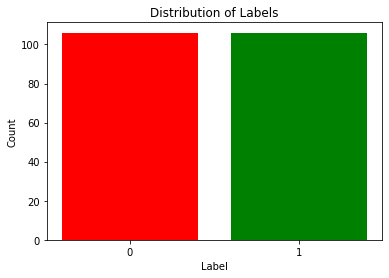

In [94]:
fig, ax = plt.subplots()
# ax.hist(labels['Label'], bins=2)
ax.bar([0, 1], [
    labels["Label"].tolist().count(0),
    labels["Label"].tolist().count(1)
], color=["red", "green"])
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.savefig('label_distribution.png')
plt.show()

## Scatter of classes PCA 2

In [91]:
df = pd.read_csv("species_data.csv", sep=";")
df = df.sort_values(by=["Sample"]).set_index("Sample")

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=2)
pca.fit(df_normalized)
X_r = pca.fit(df_normalized).transform(df_normalized)
X_r

array([[-6.37243068e-01, -6.50626371e-01],
       [-3.08609577e-02, -9.01629951e-01],
       [-8.45594332e-01, -3.93401094e-01],
       [-9.32028457e-01, -1.11876681e+00],
       [-6.97683483e-01, -6.00613989e-01],
       [-5.53501949e-01, -5.45021700e-01],
       [-4.27427973e-01, -3.14295245e-01],
       [-9.98410873e-01, -1.22602879e+00],
       [-6.81305101e-01, -7.21837094e-01],
       [-2.38428189e+00, -4.26675944e+00],
       [-6.07289107e-01, -6.00046545e-01],
       [-5.25217691e-01, -4.74033676e-01],
       [-1.73568872e+00, -2.40788193e+00],
       [-4.64879869e-01, -4.50531904e-01],
       [-1.24565546e+00, -2.01938161e+00],
       [-5.25629592e-01, -4.84270873e-01],
       [-1.16055420e+00, -1.47760846e+00],
       [-6.35543912e-01, -6.45084232e-01],
       [-6.96327919e-01, -9.31406250e-01],
       [-8.47960611e-01, -1.07744731e+00],
       [-5.92089058e-01, -5.68884260e-01],
       [-8.77270622e-01, -1.08234274e+00],
       [-4.79627513e-01, -6.43117879e-01],
       [-5.

In [97]:
labels = labels.sort_values(by=["Sample"])["Label"]

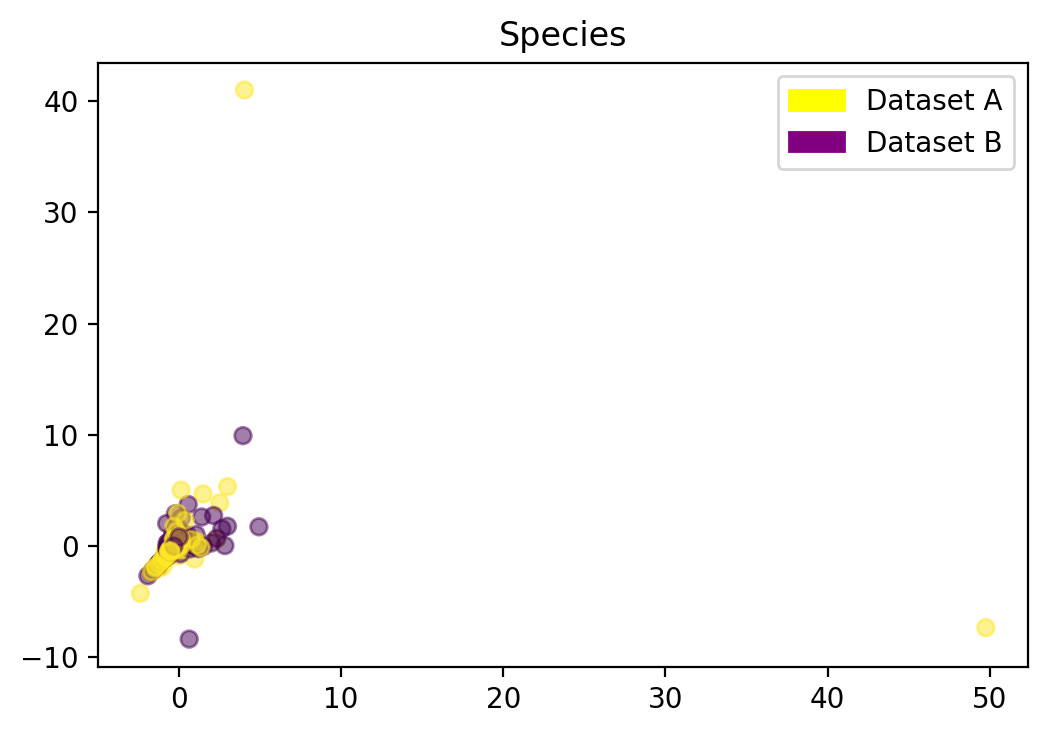

In [98]:
# Plot
plt.figure(dpi=200)
plt.title('Species')
plt.scatter(X_r[:, 0], X_r[:, 1], c=labels, alpha=0.5)
dataset_a_patch = mpatches.Patch(color='yellow', label='Dataset A')
dataset_b_patch = mpatches.Patch(color='purple', label='Dataset B')
plt.legend(handles=[dataset_a_patch, dataset_b_patch])
plt.savefig('species_pca_verify_datasets.png')
plt.show()